In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
sns.set_context("talk")

## 1. Visualise changes over layers for PIE

[0.7746293544769287, 0.7580760717391968, 0.7648276686668396, 0.7907096147537231, 0.8496761918067932]
[0.7745997905731201, 0.7585989236831665, 0.7644149661064148, 0.7904255390167236, 0.8494115471839905]
[0.7739878296852112, 0.765159010887146, 0.7511715292930603, 0.7760264873504639, 0.8295924067497253]
[0.7529850006103516, 0.7535773515701294, 0.7141714692115784, 0.7532798051834106, 0.8032815456390381]


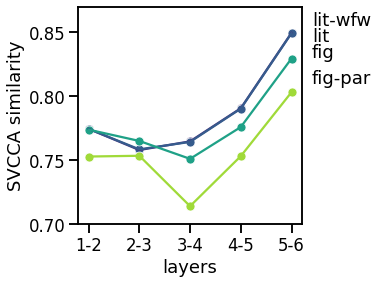

In [10]:
similarities = pickle.load(open("data/over_layers.pickle", "rb"))
def plot(x, y, color, alpha=1):
    print(y)
    sns.scatterplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
    ax = sns.lineplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
    return ax 

colours = sns.color_palette("viridis", 6)
plt.figure(figsize=(4, 4))
ax = plot("lit-wbw", similarities[(1, "NOUN")][("literal", "word-by-word")][1:], colours[0])
ax = plot("lit-wbw", similarities[(1, "NOUN")]["literal"][1:], colours[1])
ax = plot("lit-wbw", similarities[(1, "NOUN")]["figurative"][1:], colours[3])
ax = plot("lit-wbw", similarities[(1, "NOUN")][("figurative", "paraphrase")][1:], colours[5])

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(["1-2", "2-3", "3-4", "4-5", "5-6"])
plt.text(5.4, 0.855, "lit-wfw")
plt.text(5.4, 0.843, "lit")
plt.text(5.4, 0.83, "fig")
plt.text(5.4, 0.81, "fig-par")

plt.xlabel("layers")
plt.ylabel(r"SVCCA similarity")
plt.ylim(0.7, 0.87)
plt.savefig("over_layers_PIE.pdf", bbox_inches="tight")

## 2. Visualise changes over layers for non-PIEs

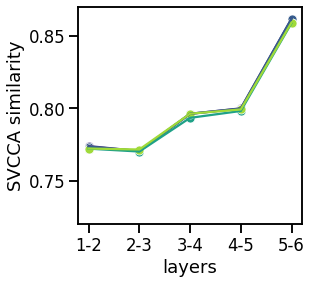

In [14]:
similarities = pickle.load(open("data/over_layers.pickle", "rb"))
def plot(x, y, color, alpha=1):
    sns.scatterplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
    ax = sns.lineplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
    return ax 

colours = sns.color_palette("viridis", 6)
plt.figure(figsize=(4, 4))
ax = plot("lit-wbw", similarities[(0, "NOUN")][("literal", "word-by-word")][1:], colours[0])
ax = plot("lit-wbw", similarities[(0, "NOUN")]["literal"][1:], colours[1])
ax = plot("lit-wbw", similarities[(0, "NOUN")]["figurative"][1:], colours[3])
ax = plot("lit-wbw", similarities[(0, "NOUN")][("figurative", "paraphrase")][1:], colours[5])

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(["1-2", "2-3", "3-4", "4-5", "5-6"])
plt.xlabel("layers")
plt.ylabel(r"SVCCA similarity")
plt.ylim(0.72, 0.87)
plt.savefig("over_layers_non_PIE.pdf", bbox_inches="tight")

## 3. Visualise results of masking

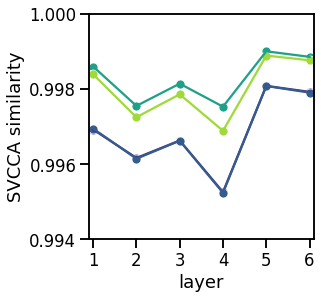

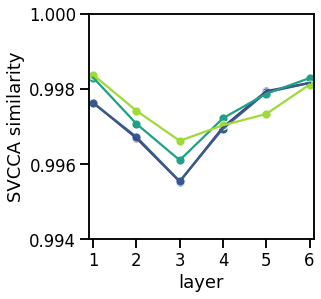

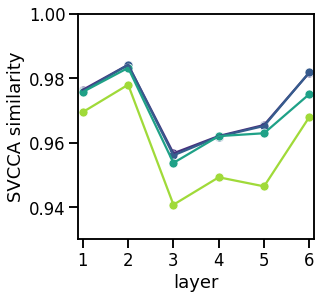

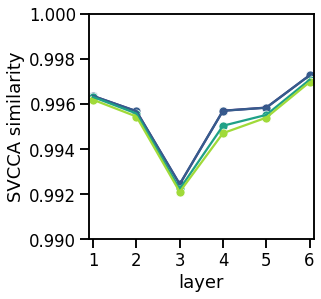

In [15]:
for setup, mini in [("con2idi", 0.994), ("idi2con", 0.994), ("idi2idi", 0.93), ("con2con", 0.99)]:
    data = pickle.load(open(f"data/svcca_{setup}.pickle", 'rb'))
    literal = data["literal"]
    figurative = data["figurative"]
    literal_word_by_word = data[("literal", "word-by-word")]
    figurative_paraphrase = data[("figurative", "paraphrase")]

    def plot(matrix, colour, label=None, ax=None, x_values=list(range(0, 6)), alpha=-1):
        sns.scatterplot(x=x_values, y=matrix, color=colour, ax=ax, alpha=alpha if alpha != -1 else 1)
        sns.lineplot(x=x_values, y=matrix, color=colour, ax=ax, alpha=alpha if alpha != -1 else 1)

    fig, (ax1) = plt.subplots(1, 1, figsize=(4.8, 4.5))
    colours = sns.color_palette("viridis", 6)
    sns.set_context("talk")
    plot(literal_word_by_word, colours[0], ax=ax1, label="lit-wbw")
    plot(literal, colours[1], ax=ax1, label="lit")
    plot(figurative, colours[3], ax=ax1, label="fig")
    plot(figurative_paraphrase, colours[5], ax=ax1, label="fig-par")

    ax1.set_xticks([0, 1, 2, 3, 4, 5])
    ax1.set_xticklabels([1, 2, 3, 4, 5, 6])
    ax1.set_xlim(-0.1, 5.1)
    ax1.set_xlabel("layer")
    ax1.set_ylabel("SVCCA similarity")

    #sns.despine(top=True, right=True)
    plt.gca().set_ylim(top=1)
    fig.tight_layout()
    #legend = plt.legend(bbox_to_anchor=(0.95, 1), framealpha=0.0)

    plt.ylim(mini, 1.0)
    #ax1.set_yticks([0.991, 0.995, 0.997, 1.0])
    plt.savefig(f"figures/influence_{setup}.pdf", bbox_inches="tight")
    plt.show()